In [146]:
# bunch of helper functions
from importlib import reload
reload(utils)

import utils


## Data
This time we're going to use the pretrained models within `tf.keras.applications` and apply them to our own problem.

For now we'll use from previous notebook. 10% of 10 categories from food101.

In [3]:
utils.print_dir("./data/05_transfer_learning_part1_feature_extraction/10_food_classes_10_percent/")

test - 10 items
    chicken_curry - 250 items
    chicken_wings - 250 items
    fried_rice - 250 items
    grilled_salmon - 250 items
    hamburger - 250 items
    ice_cream - 250 items
    pizza - 250 items
    ramen - 250 items
    steak - 250 items
    sushi - 250 items
train - 10 items
    chicken_curry - 75 items
    chicken_wings - 75 items
    fried_rice - 75 items
    grilled_salmon - 75 items
    hamburger - 75 items
    ice_cream - 75 items
    pizza - 75 items
    ramen - 75 items
    steak - 75 items
    sushi - 75 items


In [4]:
train_dir = "./data/05_transfer_learning_part1_feature_extraction/10_food_classes_10_percent/train/"
test_dir = "./data/05_transfer_learning_part1_feature_extraction/10_food_classes_10_percent/test/"

In [13]:
import tensorflow as tf
IMG_SIZE = (224, 224)

train_data_10prc = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                      label_mode="categorical",
                                                                      image_size=IMG_SIZE)

test_data_10prc = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                      label_mode="categorical",
                                                                      image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Model 0: Building a transfer learning model using the Keras Functional API

The sequential API is straight-forward, it runs our layers in sequential order.

But functional API gives us more flexibility with our models.

In [12]:
test_data_10prc.take(1)

<TakeDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [15]:
from tensorflow.keras import layers, applications
# Create base model with tf.keras.applications
base_model = applications.EfficientNetB0(include_top=False)

# Freeze patterns in the base model
base_model.trainable = False

# Create inputs into our model
inputs = layers.Input(shape=IMG_SIZE+(3,), name="input_layer")

# Layer that normalize inputs (for ResNetV2 50, Effnet has built in rescaling)
# x = layers.experimental.preprocessing.Rescaling(1./255.)(inputs)

# Pass the inputs to the bsae model
x = base_model(inputs)
print(f"Shape after passing input to base model: {x.shape}")

# Average pool the outputs of the base model (aggreagate all the most important information, reduce the number of computations))
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2d")(x)
print(f"Shape after pooling: {x.shape}")

# Create the output activation layer
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# compile the model
model_0.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

# fit the model
history_0= model_0.fit(train_data_10prc, steps_per_epoch=len(train_data_10prc),
           validation_data=test_data_10prc,
           validation_steps=len(test_data_10prc),
           epochs=5,
           callbacks=[utils.create_tensorboard_callback("logs/06_transfer_learning_part2_fine_tuning",
                                                       "EffNet_10prec_10cat_baseline")])



Shape after passing input to base model: (None, 7, 7, 1280)
Shape after pooling: (None, 1280)
Saving TensorBoard log files to: logs/06_transfer_learning_part2_fine_tuning/EffNet_10prec_10cat_baseline/20210914-101354
Epoch 1/5


c:\MLandDS\tensorflow\env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


24/24 [==============================] - 18s 521ms/step - loss: 1.9058 - accuracy: 0.3853 - val_loss: 1.3758 - val_accuracy: 0.6864
Epoch 2/5
24/24 [==============================] - 10s 408ms/step - loss: 1.1625 - accuracy: 0.7360 - val_loss: 0.9392 - val_accuracy: 0.7908
Epoch 3/5
24/24 [==============================] - 10s 405ms/step - loss: 0.8452 - accuracy: 0.8040 - val_loss: 0.7638 - val_accuracy: 0.8236
Epoch 4/5
24/24 [==============================] - 9s 401ms/step - loss: 0.6774 - accuracy: 0.8480 - val_loss: 0.6701 - val_accuracy: 0.8324
Epoch 5/5
24/24 [==============================] - 9s 402ms/step - loss: 0.5828 - accuracy: 0.8573 - val_loss: 0.6158 - val_accuracy: 0.8428


In [16]:
%load_ext tensorboard
%tensorboard --logdir ./logs/06_transfer_learning_part2_fine_tuning/

In [24]:
# Check layers of baseline models
for layer_num, layer in enumerate(base_model.layers):
    print(f"{layer_num:<4} {layer.name}")

0    input_5
1    rescaling_4
2    normalization_4
3    stem_conv_pad
4    stem_conv
5    stem_bn
6    stem_activation
7    block1a_dwconv
8    block1a_bn
9    block1a_activation
10   block1a_se_squeeze
11   block1a_se_reshape
12   block1a_se_reduce
13   block1a_se_expand
14   block1a_se_excite
15   block1a_project_conv
16   block1a_project_bn
17   block2a_expand_conv
18   block2a_expand_bn
19   block2a_expand_activation
20   block2a_dwconv_pad
21   block2a_dwconv
22   block2a_bn
23   block2a_activation
24   block2a_se_squeeze
25   block2a_se_reshape
26   block2a_se_reduce
27   block2a_se_expand
28   block2a_se_excite
29   block2a_project_conv
30   block2a_project_bn
31   block2b_expand_conv
32   block2b_expand_bn
33   block2b_expand_activation
34   block2b_dwconv
35   block2b_bn
36   block2b_activation
37   block2b_se_squeeze
38   block2b_se_reshape
39   block2b_se_reduce
40   block2b_se_expand
41   block2b_se_excite
42   block2b_project_conv
43   block2b_project_bn
44   block2b_drop


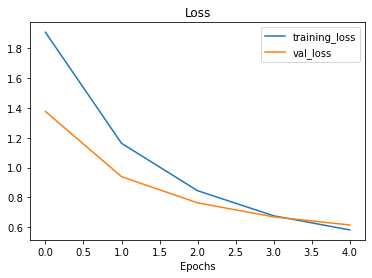

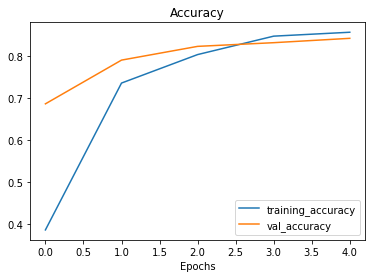

In [26]:
%matplotlib inline
utils.plot_loss_curves(history_0)

## Getting a feature vector from trained model.

Let's demonstrate the GlobalAveragePooling2D Layer.

In [35]:
# Define the input shape
shape = (1,4,4,3)
# Create a random tensor
tf.random.set_seed(42)
random_tensor = tf.random.normal(shape)
print(f"random input tensor: {random_tensor[:,:2,:,:]}\n")

# Pass the ranodm input tensor into a layer
layer = layers.GlobalAveragePooling2D()(random_tensor)
print(f"The same tensor after GlAvgPool2d:\n   {layer}")

random input tensor: [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]]]

The same tensor after GlAvgPool2d:
   [[-0.09368646 -0.45840448 -0.2885598 ]]


## Runnning series of transfer learining experiments

1. model_1 - feature extraction on 1% of data with augmentation
2. model_2 - feature extraction on 10% of data with augmentation
3. model_3 - use fine-tuning on 10% of data data with augmentation
4. model_3 - use fine-tuning on 100% of data data with augmentation

**Note**: all experiments will be evaluated on the same test set for consistency across evaluation metrics. Only train data will change.

### Getting and preprocessing data for model_1

In [37]:
#!tar -xf ./data/06_transfer_learning_part2_fine_tuning/10_food_classes_1_percent.zip -C ./data/06_transfer_learning_part2_fine_tuning/

In [38]:
# Check the 1% data
utils.print_dir("data/06_transfer_learning_part2_fine_tuning/10_food_classes_1_percent/")

test - 10 items
    chicken_curry - 250 items
    chicken_wings - 250 items
    fried_rice - 250 items
    grilled_salmon - 250 items
    hamburger - 250 items
    ice_cream - 250 items
    pizza - 250 items
    ramen - 250 items
    steak - 250 items
    sushi - 250 items
train - 10 items
    chicken_curry - 7 items
    chicken_wings - 7 items
    fried_rice - 7 items
    grilled_salmon - 7 items
    hamburger - 7 items
    ice_cream - 7 items
    pizza - 7 items
    ramen - 7 items
    steak - 7 items
    sushi - 7 items


In [54]:
# Data loaders
MG_SIZE = (224, 224)

train_1prec_dir = "data/06_transfer_learning_part2_fine_tuning/10_food_classes_1_percent/train"
test_data_dir = "data/06_transfer_learning_part2_fine_tuning/10_food_classes_1_percent/test"

train_1prec = tf.keras.preprocessing.image_dataset_from_directory(train_1prec_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_data_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model

We'll embedd augmentation in model using `tf.keras.experimental.preprocessing()`

In [59]:
# imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications, Model, Sequential
from tensorflow.keras.layers.experimental import preprocessing

# create base model
base_model = applications.EfficientNetB0(include_top=False)
base_model.trainable = False
# Create data augmentation stage
data_aug = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
])

# Create inputs
inputs = layers.Input(shape=IMG_SIZE+(3,), name="input_name")

x = data_aug(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="gl_avg_pool_2d")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = Model(inputs, outputs)

In [60]:
model_1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

history_1 = model_1.fit(train_1prec,
            steps_per_epoch=len(train_1prec),
            validation_data=test_data_10prc,
            validation_steps=len(test_data),
            epochs=5,
            callbacks=[utils.create_tensorboard_callback("logs/06_transfer_learning_part2_fine_tuning/",
                                                         "EffNet_1prec_dataaug")]
           )

Saving TensorBoard log files to: logs/06_transfer_learning_part2_fine_tuning//EffNet_1prec_dataaug/20210914-114528
Epoch 1/5
3/3 [==============================] - 18s 6s/step - loss: 2.4010 - accuracy: 0.0714 - val_loss: 2.2622 - val_accuracy: 0.1836
Epoch 2/5
3/3 [==============================] - 9s 4s/step - loss: 2.1344 - accuracy: 0.2714 - val_loss: 2.1427 - val_accuracy: 0.2508
Epoch 3/5
3/3 [==============================] - 9s 4s/step - loss: 1.9990 - accuracy: 0.3714 - val_loss: 2.0465 - val_accuracy: 0.3092
Epoch 4/5
3/3 [==============================] - 9s 4s/step - loss: 1.8121 - accuracy: 0.4857 - val_loss: 1.9618 - val_accuracy: 0.3476
Epoch 5/5
3/3 [==============================] - 8s 4s/step - loss: 1.6742 - accuracy: 0.5571 - val_loss: 1.8808 - val_accuracy: 0.4036


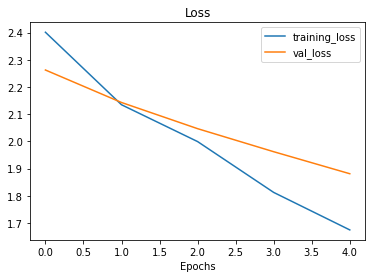

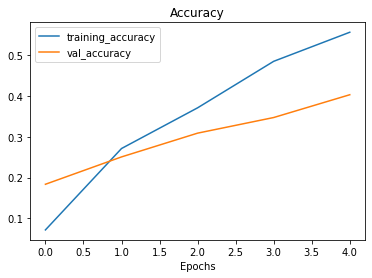

In [61]:
utils.plot_loss_curves(history_1)

### model_2 - same as model_1 but trained on 10% of the data

In [111]:
tf.random.set_seed(42)

# Create data augmentation stage
data_aug = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
])


base_model = applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=IMG_SIZE+(3,), name="input_layer")

x = data_aug(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="gl_avg_pool_2d")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model_2 = Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

callbacks = [
    utils.create_tensorboard_callback("logs/06_transfer_learning_part2_fine_tuning/",
                                                         "EffNet_10prec_dataaug"),
    utils.create_checkpoint_callback("checkpoints/06_transfer_learning_part2_fine_tuning/model_2/model_2.ckpt",
                                     weights_only=True,
                                     best_only=True)]

history_2 = model_2.fit(train_data_10prc,
            steps_per_epoch=len(train_data_10prc),
            validation_data=test_data,
            validation_steps=len(test_data),
            epochs=5,
            callbacks = callbacks
           )

Saving TensorBoard log files to: logs/06_transfer_learning_part2_fine_tuning//EffNet_10prec_dataaug/20210914-134435
Epoch 1/5


c:\MLandDS\tensorflow\env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


24/24 [==============================] - 24s 727ms/step - loss: 2.1125 - accuracy: 0.2560 - val_loss: 1.6035 - val_accuracy: 0.5688

Epoch 00001: val_accuracy improved from -inf to 0.56880, saving model to checkpoints/06_transfer_learning_part2_fine_tuning/model_2\model_2.ckpt
Epoch 2/5
24/24 [==============================] - 14s 593ms/step - loss: 1.4289 - accuracy: 0.6440 - val_loss: 1.1228 - val_accuracy: 0.7484

Epoch 00002: val_accuracy improved from 0.56880 to 0.74840, saving model to checkpoints/06_transfer_learning_part2_fine_tuning/model_2\model_2.ckpt
Epoch 3/5
24/24 [==============================] - 14s 593ms/step - loss: 1.0871 - accuracy: 0.7280 - val_loss: 0.9018 - val_accuracy: 0.7828

Epoch 00003: val_accuracy improved from 0.74840 to 0.78280, saving model to checkpoints/06_transfer_learning_part2_fine_tuning/model_2\model_2.ckpt
Epoch 4/5
24/24 [==============================] - 14s 580ms/step - loss: 0.9351 - accuracy: 0.7600 - val_loss: 0.7792 - val_accuracy: 0.808

In [112]:
# Compare models 0 and models 2 results
model_0.evaluate(test_data)

79/79 [==============================] - 10s 102ms/step - loss: 0.6158 - accuracy: 0.8428


[0.6158241033554077, 0.8428000211715698]

In [113]:
model_2_results = model_2.evaluate(test_data)

79/79 [==============================] - 9s 102ms/step - loss: 0.7111 - accuracy: 0.8112


Looks like model trained on augmented data performs worse.

In [114]:
model_2.load_weights("checkpoints/06_transfer_learning_part2_fine_tuning/model_2/model_2.ckpt")

In [115]:
loaded_model2_results = model_2.evaluate(test_data)

79/79 [==============================] - 8s 100ms/step - loss: 0.7111 - accuracy: 0.8112


## Model_3: Fine-tuning an existing model on 10% of our data

In [118]:
base_model.trainable = True
# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [119]:
tf.random.set_seed(42)

callbacks = [
    utils.create_tensorboard_callback("logs/06_transfer_learning_part2_fine_tuning/",
                                                         "EffNet_10prec_dataaug_fine_tune"),
    utils.create_checkpoint_callback("checkpoints/06_transfer_learning_part2_fine_tuning/model_3/checkpoint.ckpt",
                                     weights_only=True,
                                     best_only=True)]

# While fine tuning you should lower learing rate by x/10
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])


model_3 = model_2.fit(train_data_10prc,
            steps_per_epoch=len(train_data_10prc),
            validation_data=test_data,
            validation_steps=len(test_data),
            epochs=10,
            initial_epoch=history_2.epoch[-1],
            callbacks = callbacks
           )

Saving TensorBoard log files to: logs/06_transfer_learning_part2_fine_tuning//EffNet_10prec_dataaug_fine_tune/20210914-134625
Epoch 5/10
24/24 [==============================] - 25s 743ms/step - loss: 0.6943 - accuracy: 0.8053 - val_loss: 0.5591 - val_accuracy: 0.8272

Epoch 00005: val_accuracy improved from -inf to 0.82720, saving model to checkpoints/06_transfer_learning_part2_fine_tuning/model_3\checkpoint.ckpt
Epoch 6/10
24/24 [==============================] - 15s 593ms/step - loss: 0.5410 - accuracy: 0.8680 - val_loss: 0.5336 - val_accuracy: 0.8276

Epoch 00006: val_accuracy improved from 0.82720 to 0.82760, saving model to checkpoints/06_transfer_learning_part2_fine_tuning/model_3\checkpoint.ckpt
Epoch 7/10
24/24 [==============================] - 14s 584ms/step - loss: 0.4689 - accuracy: 0.8587 - val_loss: 0.4949 - val_accuracy: 0.8400

Epoch 00007: val_accuracy improved from 0.82760 to 0.84000, saving model to checkpoints/06_transfer_learning_part2_fine_tuning/model_3\checkpoi

In [121]:
model_2.evaluate(test_data), model_2_results

79/79 [==============================] - 9s 104ms/step - loss: 0.4892 - accuracy: 0.8396


([0.4891921281814575, 0.8396000266075134],
 [0.7110706567764282, 0.8112000226974487])

We got 2% better results

## Model_4 - Full data, 10 classes

In [122]:
# Data it the same as in notebook 04

In [124]:
utils.print_dir("./data/04_Computer_Vision_and_CNNs/10_food_classes_all_data/")

test - 10 items
    chicken_curry - 250 items
    chicken_wings - 250 items
    fried_rice - 250 items
    grilled_salmon - 250 items
    hamburger - 250 items
    ice_cream - 250 items
    pizza - 250 items
    ramen - 250 items
    steak - 250 items
    sushi - 250 items
train - 10 items
    chicken_curry - 750 items
    chicken_wings - 750 items
    fried_rice - 750 items
    grilled_salmon - 750 items
    hamburger - 750 items
    ice_cream - 750 items
    pizza - 750 items
    ramen - 750 items
    steak - 750 items
    sushi - 750 items


In [127]:
train_path= "data/04_Computer_Vision_and_CNNs/10_food_classes_all_data/train"
test_path = "data/04_Computer_Vision_and_CNNs/10_food_classes_all_data/test"

train_full, test_full = utils.create_data_loaders(train_path, test_path)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


To create a model_4 we have to revert model_2 back to its feature extraction weights.


In [128]:
# Load weights from checkpoint
model_2.load_weights("checkpoints/06_transfer_learning_part2_fine_tuning/model_2/model_2.ckpt")

In [129]:
model_2.evaluate(test_data), model_2_results

79/79 [==============================] - 9s 104ms/step - loss: 0.7111 - accuracy: 0.8112


([0.7110706567764282, 0.8112000226974487],
 [0.7110706567764282, 0.8112000226974487])

They are the same. We can proceed.

In [132]:
# Check which layers are tunable
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_23 False
rescaling_22 False
normalization_22 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_project_conv Fa

This is OK.

In [133]:
# Recompile the model 2 and fine tune it on full data
# While fine tuning you should lower learing rate by x/10
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])

callbacks = [
    utils.create_tensorboard_callback("logs/06_transfer_learning_part2_fine_tuning/",
                                                         "EffNet_10prec_dataaug_fine_tune_fulldata"),
    utils.create_checkpoint_callback("checkpoints/06_transfer_learning_part2_fine_tuning/model_4/checkpoint.ckpt",
                                     weights_only=True,
                                     best_only=True)]

history_4 = model_2.fit(train_full,
            steps_per_epoch=len(train_full),
            validation_data=test_data,
            validation_steps=len(test_data),
            epochs=10,
            initial_epoch=history_2.epoch[-1],
            callbacks = callbacks
           )

Saving TensorBoard log files to: logs/06_transfer_learning_part2_fine_tuning//EffNet_10prec_dataaug_fine_tune_fulldata/20210914-140749
Epoch 5/10


c:\MLandDS\tensorflow\env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


235/235 [==============================] - 55s 203ms/step - loss: 0.7295 - accuracy: 0.7651 - val_loss: 0.4103 - val_accuracy: 0.8712

Epoch 00005: val_accuracy improved from -inf to 0.87120, saving model to checkpoints/06_transfer_learning_part2_fine_tuning/model_4\checkpoint.ckpt
Epoch 6/10
235/235 [==============================] - 53s 224ms/step - loss: 0.5785 - accuracy: 0.8128 - val_loss: 0.3482 - val_accuracy: 0.8884

Epoch 00006: val_accuracy improved from 0.87120 to 0.88840, saving model to checkpoints/06_transfer_learning_part2_fine_tuning/model_4\checkpoint.ckpt
Epoch 7/10
235/235 [==============================] - 53s 225ms/step - loss: 0.5148 - accuracy: 0.8353 - val_loss: 0.3381 - val_accuracy: 0.8860

Epoch 00007: val_accuracy did not improve from 0.88840
Epoch 8/10
235/235 [==============================] - 50s 212ms/step - loss: 0.4726 - accuracy: 0.8483 - val_loss: 0.3374 - val_accuracy: 0.8916

Epoch 00008: val_accuracy improved from 0.88840 to 0.89160, saving model 

In [137]:
model_5_results = model_2.evaluate(test_data), model_2_results

79/79 [==============================] - 9s 104ms/step - loss: 0.3124 - accuracy: 0.9012


In [138]:
%tensorboard --logdir ./logs/06_transfer_learning_part2_fine_tuning/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 2244), started 4:05:02 ago. (Use '!kill 2244' to kill it.)

In [153]:
tf.random.set_seed(42)

# Create data augmentation stage
data_aug = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
])


base_model = applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=IMG_SIZE+(3,), name="input_layer", dtype=tf.float32)

x = data_aug(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="gl_avg_pool_2d")(x)
outputs = layers.Dense(10, activation="softmax", dtype=tf.float32)(x)

model_2 = Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])



In [151]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce GTX 1660 Ti, compute capability 7.5


In [ ]:
callbacks = [
    utils.create_tensorboard_callback("logs/06_transfer_learning_part2_fine_tuning/",
                                                         "test"),
    utils.create_checkpoint_callback("checkpoints/06_transfer_learning_part2_fine_tuning/model_3433/test_0.ckpt",
                                     weights_only=True,
                                     best_only=True)]

utils.create_model_for_fine_tuning(base_model)


history_2 = model_2.fit(train_full,
            steps_per_epoch=len(train_full),
            validation_data=test_data,
            validation_steps=len(test_data),
            epochs=5,
            callbacks = callbacks
           )

Saving TensorBoard log files to: logs/06_transfer_learning_part2_fine_tuning//test/20210914-143449
Epoch 1/5


c:\MLandDS\tensorflow\env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


235/235 [==============================] - 66s 251ms/step - loss: 1.1112 - accuracy: 0.6688 - val_loss: 0.5263 - val_accuracy: 0.8452

Epoch 00001: val_accuracy improved from -inf to 0.84520, saving model to checkpoints/06_transfer_learning_part2_fine_tuning/model_3433\test_0.ckpt
Epoch 2/5
235/235 [==============================] - 52s 220ms/step - loss: 0.6910 - accuracy: 0.7839 - val_loss: 0.4375 - val_accuracy: 0.8640

Epoch 00002: val_accuracy improved from 0.84520 to 0.86400, saving model to checkpoints/06_transfer_learning_part2_fine_tuning/model_3433\test_0.ckpt
Epoch 3/5
 94/235 [===========>..................] - ETA: 23s - loss: 0.5927 - accuracy: 0.8165